<a href="https://colab.research.google.com/github/ssssihoon/Learn/blob/main/DL/CNN/CNN_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 전처리

## notebook 셋업

In [ ]:
#!pip install tensorflow

## import 라이브러리

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10 # cifar10 데이터셋 참조. 이 데이터를 활용해 cnn 측정예정
%matplotlib inline
tf.__version__

'2.15.0'

## 데이터 준비

In [ ]:
# 데이터셋의 class name 셋팅
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
# Cifar10 데이터셋 불러오기 -> 훈련, 테스트 데이터 초기화
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
# 이미지 표준화 : 컨볼루션 신경망이 더 빨리 훈련되도록 이미지를 표준화

X_train = X_train / 255.0        # RGB 최댓값인 255로 나누어서 픽셀값이 0~1의 범위로 값이 나올 수 있도록 조정

In [ ]:
X_train.shape     # 뒤의 3은 컬러이기 때문 , 4차원 = [데이터의 개수] * [2차원의 픽셀 (32x32)] * [컬러 (RGB)]

(50000, 32, 32, 3)

In [ ]:
X_test = X_test / 255.0

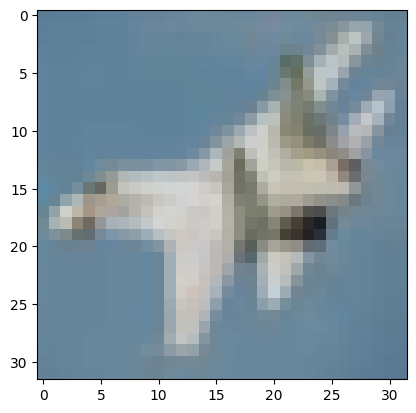

In [ ]:
plt.imshow(X_test[10]) # X_test의 10번째 이미지 한장을 보여줌

# CNN 구축

### Defining the model

In [ ]:
model = tf.keras.models.Sequential() # 모델 변수를 순차 클래스의 인스턴스로 구축

## Adding the first convolutional layer

CNN Layer HyperParameter

- filter : 32

- kernel_size : 3         

- padding : same  

- activation : relu  

- input_shape : (32, 32, 3)

<br>


 .. // 3x3 사이즈의 필터가 32개

 <br>

 padding의 경우 same 또는 valid를 주로 이용

 <br>

 same -> 홀수의 배열에 짝수의 필터사이즈인 경우 0을 추가해서 max값을 필터링한다.

 valid -> 마지막 열을 무시하고 필터사이즈 대로만 max값을 필터링 (마지막 데이터가 소실됨.)








In [ ]:
# 첫 번째 컨볼루션 레이어 추가

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))

## Adding the second convolutional layer&the max-pooling layer

맥스 풀링 레이어. 맥스 풀링은 오직 최댓값만을 저장한다. -> 그래서 출력 텐서의 크기를 줄이고, 학습을 덜 복잡하게 함. 하지만 정보는 계속 보관하기 때문에 모델은 계속 학습을 진행한다.

CNN Layer Hyper-Parameters :     

- filters : 32.
- kernel_size : 3.  
- padding : same
- activation : relu

MaxPool Layer Hyper-Parameters :     
- pool_size : 2.   
- strides : 2.       -> 간격을 2개의 간격으로 이동하겠다.
- padding : valid

In [ ]:
# 두번째 컨볼루션 레이어
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [ ]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

## Adding the third convolutional layer

CNN Layer Hyper-Parameters :

- filters : 64.
- kernel_size : 3.
- padding : same
- activation : relu

In [ ]:
# 세 번째 컨볼루션 레이어
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

## Adding the fourth convolutional layer and max-pooling layer

CNN Layer Hyper-Parameters :     

- filters : 64
- kernel_size : 3.  
- padding : same
- activation : relu

MaxPool Layer Hyper-Parameters :     
- pool_size : 2.   
- strides : 2.      
- padding : valid

In [ ]:
# 마지막 컨볼루션 레이어
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [ ]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

## Adding the flattening layer
평탄화 레이어를 추가
-> 컨볼루션과 맥스 풀링의 최종 결과물을 1차원 레이어로 평탄화 할 것임


In [ ]:
# keras에서 평탄화 클래스를 가져오는데 여기에는 입력할 것이 없음.
# model에 무엇이 있었는지 자동으로 인식해서 이곳에서 일어날 연산의 결과물을 평탄화할 대상을 이해할 것임.
model.add(tf.keras.layers.Flatten())

## Adding the first fully-connected layer

완전 연결 레이어 추가 (출력레이어가 아님!)

Dense layer hyper-parameters:
- units / neurons : 128 -> 128개의 은닉뉴런을 유닛으로 사용
- activation : relu

In [ ]:
# 완전 연결 레이어 추가. -> 밀집 클래스 이용
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

## Adding the output layer
Dense layer hyper-parameters:
- units/neurons : 10 -> 클래스가 10개였기 때문
- activations : softmax

In [ ]:
model.add(tf.keras.layers.Dense(units=10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                   

-> output shape을 보면 차원을 알 수 있음.
<br>
-> 591,274가지의 업데이트될 학습 가능한 방법이 나옴.

# CNN 학습, 평가

## model compile

model을 옵티마이저와 손실과 측정치에 연결시키는 것임.

옵티마이저 : 확률적 경사 하강법으로 가중치를 업데이트해 손실을 줄이는 도구

손실 : 모델의 예측 사이에 발생한 오류. 모델이 이미지의 내용물을 예측한 내용과 실제 값 사이의 오류

학습을 시킬 때는 예측 내용과 비교할 실제 값이 존재해서 손실을 고정하고 최종적으로 업데이트하는 것.(경사하강법으로)

옵티마이저는 Adam을 사용. 최고의 확률적 경사하강법 중 하나임.





In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
# 아담 옵티마이저, 교차 엔트로피 손실, 희소 카테고리
# 희소 카테고리 정확도를 사용하는 이유는 다중클래스이기 때문 . 2개이상의 클래스 분류

## Traing the model

In [ ]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 264s 169ms/step - loss: 0.7105 - sparse_categorical_accuracy: 0.7515
Epoch 2/5
1563/1563 [==============================] - 265s 170ms/step - loss: 0.5874 - sparse_categorical_accuracy: 0.7949
Epoch 3/5
1563/1563 [==============================] - 269s 172ms/step - loss: 0.4842 - sparse_categorical_accuracy: 0.8289
Epoch 4/5
1563/1563 [==============================] - 261s 167ms/step - loss: 0.3936 - sparse_categorical_accuracy: 0.8596
Epoch 5/5
1563/1563 [==============================] - 265s 170ms/step - loss: 0.3160 - sparse_categorical_accuracy: 0.8876


## Evaluating the model

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 14s 45ms/step - loss: 0.9208 - sparse_categorical_accuracy: 0.7403
